In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (13, 8)

In [49]:
data = pd.read_csv('../data/DailyConfirmedCasesWithFeatures.csv')
growth_factor = data['GrowthFactor'].values
growth_diff = np.insert(np.diff(growth_factor), 0, 0)
growth_accel = np.insert(np.diff(growth_diff), 0, 0)

date = data['DateVal']

In [50]:
def predict(x, P, A, Q):
    x_predict = A @ x
    P_predict = A @ P @ A.T + Q

    return [x_predict, P_predict]


def update(x_predict, P_predict, z, R, H):
    x_dim = len(x_predict)
    K = P_predict @ H @ np.linalg.inv(H @ P_predict @ H.T + R)
    x = x_predict + K @ (z - H @ x_predict)
    P = (np.eye(x_dim) - K @ H) @ P_predict

    return [x, P]


In [102]:
size = (len(growth_factor),)
dim_x = 3
Q = np.zeros((dim_x, dim_x))
R = np.array([
    [10, 0, 0],
    [0, 10, 0],
    [0, 0, 10]
])
A = np.array(
    [[1., 1., 0.5],
    [0., 1., 1],
    [0, 0, 1]]
)
H = np.eye(dim_x)
x = np.array([[growth_factor[0]], [growth_diff[0]], [growth_accel[0]]])
P = np.array(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ]
)

In [103]:
output = [x.squeeze()]
error = [P[0, 0]]
prediction = [x.squeeze()]
for k in range(1, *size):
    # Time update
    x_p, P_p = predict(x, P, A, Q)
    prediction.append(x_p.squeeze())
    # Measurement update
    z = np.array([[growth_factor[k]],[growth_diff[k]], [growth_accel[k]]])
    x, P = update(x_p, P_p, z, R, H)
    output.append(x.squeeze())
    error.append(P[0, 0])
output = np.array(output)
error = np.array(error)
prediction = np.array(prediction)

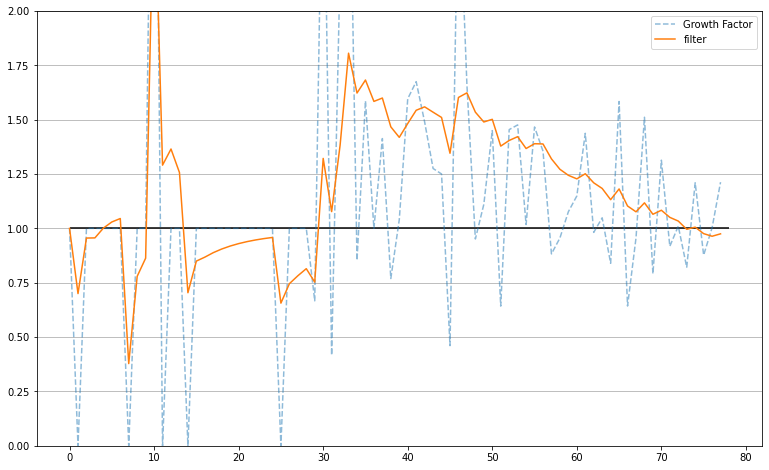

In [104]:
x_axis = np.arange(0, *size)
plt.plot(
    x_axis,
    growth_factor,
    linestyle='--',
    alpha=0.5,
    label='Growth Factor'
)
plt.plot(
    x_axis,
    output[:, 0],
    label='filter'
)
plt.ylim(0, 2)
plt.hlines(1, 0, *size)
plt.legend()
plt.grid(which='major', axis='y');